# 下载MMCV及其相关环境

安装pytorch

In [1]:
!pip3 install install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio==0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html


mim安装mmcv

In [2]:
!pip install -U openmim
!mim install openmim mmengine
# !mim install 'mmcv>=2.0.0rc1'
!mim install 'mmcv==2.0.0rc4' mmcv-full

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.10.0/index.html
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.10.0/index.html


其他工具包

In [3]:
!pip install opencv-python pillow matplotlib seaborn tqdm 'mmdet>=3.0.0rc1' -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


下载MMSegmentation

In [49]:
# 从 github 上下载最新的 mmsegmentation 源代码
!git clone https://github.com/open-mmlab/mmsegmentation.git -b dev-1.x

正克隆到 'mmsegmentation'...
remote: Enumerating objects: 13490, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 13490 (delta 32), reused 60 (delta 10), pack-reused 13360
接收对象中: 100% (13490/13490), 16.18 MiB | 7.03 MiB/s, 完成.
处理 delta 中: 100% (9623/9623), 完成.
正在更新文件: 100% (1331/1331), 完成.


In [4]:
# 进入主目录
import os
os.chdir('mmsegmentation')

In [5]:
pwd

'/home/featurize/work/OpenMMlab_AI_2023.2/run/mmsegmentation'

In [5]:
!pip install -v -e .

Using pip 21.1.3 from /environment/miniconda3/lib/python3.7/site-packages/pip (python 3.7)
Non-user install because site-packages writeable
Created temporary directory: /tmp/pip-ephem-wheel-cache-99a24w_v
Created temporary directory: /tmp/pip-req-tracker-vivfny1i
Initialized build tracking at /tmp/pip-req-tracker-vivfny1i
Created build tracker: /tmp/pip-req-tracker-vivfny1i
Entered build tracker: /tmp/pip-req-tracker-vivfny1i
Created temporary directory: /tmp/pip-install-qj5n3n4k
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Obtaining file:///home/featurize/work/OpenMMlab_AI_2023.2/run/mmsegmentation
  Added file:///home/featurize/work/OpenMMlab_AI_2023.2/run/mmsegmentation to build tracker '/tmp/pip-req-tracker-vivfny1i'
    Running setup.py (path:/home/featurize/work/OpenMMlab_AI_2023.2/run/mmsegmentation/setup.py) egg_info for package from file:///home/featurize/work/OpenMMlab_AI_2023.2/run/mmsegmentation
    Created temporary directory: /tmp/pip-pip-egg-info-o2hpfib6

mmsegmentation下载官方文档：https://github.com/open-mmlab/mmsegmentation/blob/master/docs/en/get_started.md#installation

In [6]:
pip install mmsegmentation

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


检查安装成功

In [7]:
# 检查 Pytorch
import torch, torchvision
print('Pytorch 版本', torch.__version__)
print('CUDA 是否可用',torch.cuda.is_available())

Pytorch 版本 1.10.1+cu113
CUDA 是否可用 True


In [8]:
# 检查 mmcv
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('MMCV版本', mmcv.__version__)
print('CUDA版本', get_compiling_cuda_version())
print('编译器版本', get_compiler_version())

MMCV版本 2.0.0rc4
CUDA版本 11.3
编译器版本 GCC 9.3


In [9]:
# 检查 mmsegmentation
import mmseg
from mmseg.utils import register_all_modules
from mmseg.apis import inference_model, init_model
print('mmsegmentation版本', mmseg.__version__)

mmsegmentation版本 1.0.0rc5


安装以下目录存放训练数据

In [61]:
import os

# 创建 checkpoint 文件夹，用于存放预训练模型权重文件
os.mkdir('checkpoint')

# 创建 outputs 文件夹，用于存放预测结果
os.mkdir('outputs')

# 创建 data 文件夹，用于存放图片和视频素材
os.mkdir('data')

下载预训练模型权重

Model Zoo：https://github.com/open-mmlab/mmsegmentation/blob/master/docs/en/model_zoo.md

In [79]:
!mim download mmsegmentation --config pspnet_r50-d8_4xb2-80k_cityscapes-512x1024 --dest ./checkpoint

processing pspnet_r50-d8_4xb2-80k_cityscapes-512x1024...
pspnet_r50-d8_512x1024_80k_cityscapes_20200606_112131-2376f12b.pth exists in /home/featurize/work/OpenMMlab_AI_2023.2/run/mmsegmentation/checkpoint
Successfully dumped pspnet_r50-d8_4xb2-80k_cityscapes-512x1024.py to /home/featurize/work/OpenMMlab_AI_2023.2/run/mmsegmentation/checkpoint


In [60]:
pwd

'/home/featurize/work/OpenMMlab_AI_2023.2/run/mmsegmentation'

# 下载数据集（组织病理切片小鼠肾小球-单类别/二分类）

In [62]:
!wget -P data https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/Glomeruli-dataset.zip 

--2023-02-10 23:23:48--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/Glomeruli-dataset.zip
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 2628579054 (2.4G) [application/zip]
正在保存至: “data/Glomeruli-dataset.zip”

Glomeruli-dataset.z 100%[===================>]   2.45G  60.4MB/s    用时 48s     

2023-02-10 23:24:37 (52.1 MB/s) - 已保存 “data/Glomeruli-dataset.zip” [2628579054/2628579054])



## 解压缩数据集到data目录下

In [67]:
# 解压
!unzip data/Glomeruli-dataset.zip  -d data>> /dev/null

## 探索数据集

### 导入工具包

In [6]:
import os

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

### 指定图像和标注文件夹的位置

In [68]:
PATH_IMAGE = 'data/Glomeruli-dataset/images'
PATH_MASKS = 'data/Glomeruli-dataset/masks'

In [69]:
print('图像个数', len(os.listdir(PATH_IMAGE)))
print('标注个数', len(os.listdir(PATH_MASKS)))

图像个数 2575
标注个数 2575


## 查看单张图像及其语义分割标注

In [9]:
# 指定图像文件名
file_name = 'SAS_21883_001_10.png'

In [10]:
img_path = os.path.join(PATH_IMAGE, file_name)
mask_path = os.path.join(PATH_MASKS, file_name)

print('图像路径', img_path)
print('标注路径', mask_path)

图像路径 data/Glomeruli-dataset/images/SAS_21883_001_10.png
标注路径 data/Glomeruli-dataset/masks/SAS_21883_001_10.png


In [11]:
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)

In [12]:
img.shape

(1024, 1024, 3)

(-0.5, 1023.5, 1023.5, -0.5)

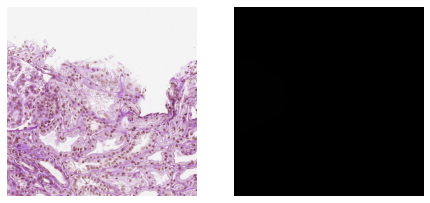

In [21]:
# 可视化图像
plt.figure(figsize=(40, 10))

# 打印原图和mask图片信息

plt.subplot(2, 10, 1)
plt.imshow(img)
plt.axis('off')
plt.subplot(2, 10, 2)
plt.imshow(mask)
# plt.axis(‘off’) 关闭坐标轴
plt.axis('off')

In [14]:
mask.shape

(1024, 1024, 3)

np.unique可以去掉重复值

In [15]:
# mask 语义分割标注，与原图大小相同，0 为 背景， 1 为 肾小球
np.unique(mask)

array([0, 1], dtype=uint8)

In [26]:
mask.shape

(1024, 1024, 3)

在本数据集中，只有一部分图像有肾小球语义分割标注（即mask中值为1的像素），其余图像mask的值均为0

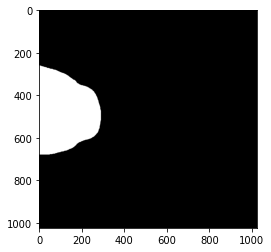

In [27]:
# 可视化语义分割标注
plt.imshow(mask*255)
plt.show()

## 可视化单张图像及其语义分割标注

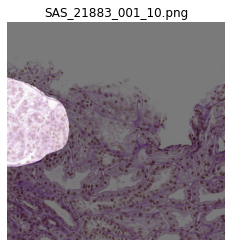

In [28]:
plt.imshow(img)
plt.imshow(mask*255, alpha=0.5) # alpha 高亮区域透明度，越小越接近原图
plt.title(file_name)
plt.axis('off')
plt.show()

## 可视化-有前景标注

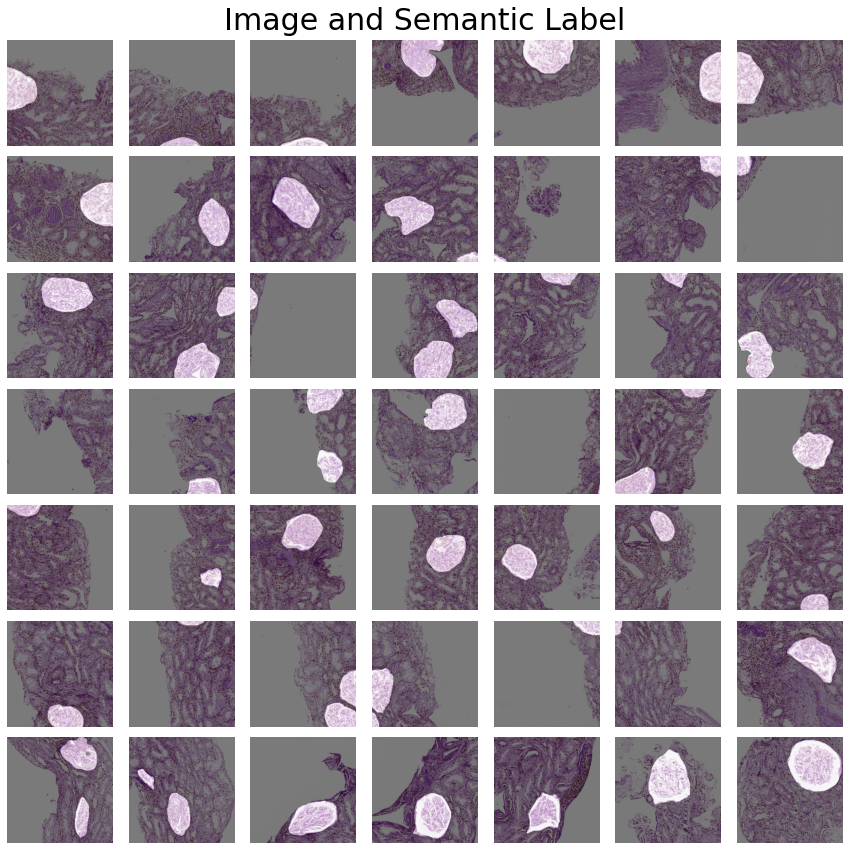

In [29]:
# n行n列可视化
n = 7

# 标注区域透明度
opacity = 0.5

fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True, figsize=(12,12))

i = 0

for file_name in os.listdir(PATH_IMAGE):
    
    # 载入图像和标注
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name)
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    # 控制多行绘制
    if 1 in mask:
        axes[i//n, i%n].imshow(img)
        axes[i//n, i%n].imshow(mask*255, alpha=opacity)
        axes[i//n, i%n].axis('off') # 关闭坐标轴显示
        i += 1
    if i > n**2-1:
        break
fig.suptitle('Image and Semantic Label', fontsize=30)
plt.tight_layout()
plt.show()

## 可视化-无论前景是否有标注

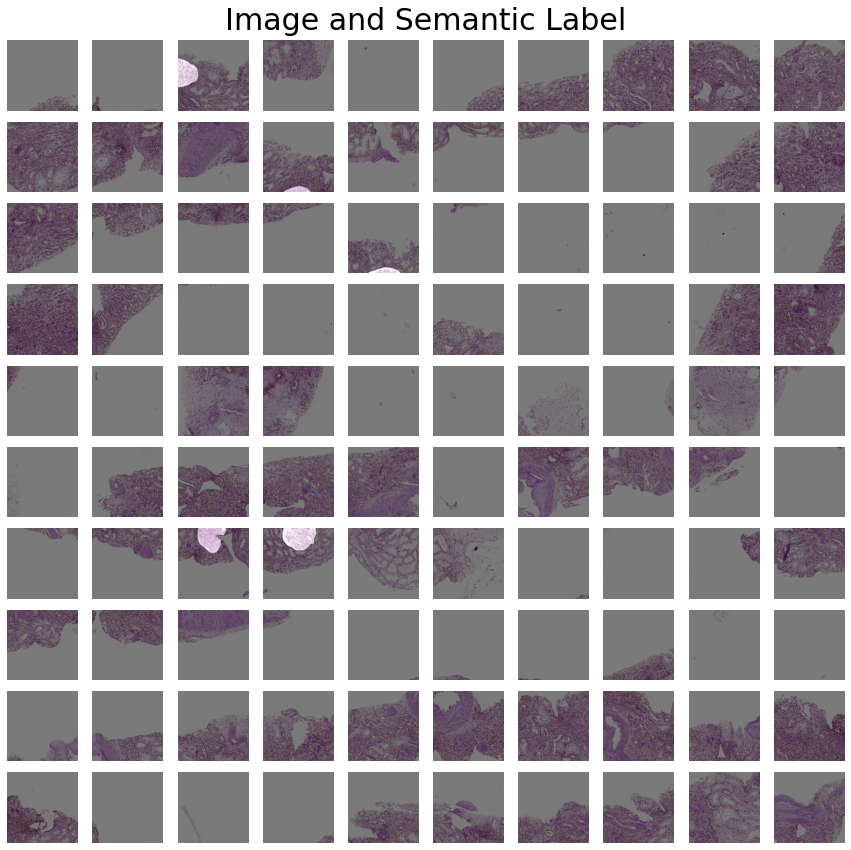

In [30]:
# n行n列可视化
n = 10

# 标注区域透明度
opacity = 0.5

fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True, figsize=(12,12))

for i, file_name in enumerate(os.listdir(PATH_IMAGE)[:n**2]):
    
    # 载入图像和标注
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name)
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    
    # 可视化
    axes[i//n, i%n].imshow(img)
    axes[i//n, i%n].imshow(mask*255, alpha=opacity)
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('Image and Semantic Label', fontsize=30)
plt.tight_layout()
plt.show()

# 划分训练集和测试集

In [31]:
import os
import random

## 获取全部数据文件名列表

In [32]:
PATH_IMAGE = 'data/Glomeruli-dataset/images'

In [33]:
all_file_list = os.listdir(PATH_IMAGE)
all_file_num = len(all_file_list)
random.shuffle(all_file_list) # 随机打乱全部数据文件名列表

## 指定训练集和测试集比例

In [34]:
train_ratio = 0.8
test_ratio = 1 - train_ratio

In [35]:
train_file_list = all_file_list[:int(all_file_num*train_ratio)]
test_file_list = all_file_list[int(all_file_num*train_ratio):]

In [36]:
print('数据集图像总数', all_file_num)
print('训练集划分比例', train_ratio)
print('训练集图像个数', len(train_file_list))
print('测试集图像个数', len(test_file_list))

数据集图像总数 2575
训练集划分比例 0.8
训练集图像个数 2060
测试集图像个数 515


In [37]:
train_file_list[:5]

['VUHSK_1622_168.png',
 'SAS_21937_001_101.png',
 'SAS_21883_001_21.png',
 'VUHSK_1702_69.png',
 'SESCAM_6_0_73.png']

In [38]:
test_file_list[:5]

['SAS_21937_001_84.png',
 'VUHSK_1622_22.png',
 'VUHSK_1622_68.png',
 'VUHSK_1432_76.png',
 'SAS_21915_001_40.png']

In [39]:
## 分成两个txt划分文件

In [73]:
os.mkdir('data/Glomeruli-dataset/splits')

In [74]:
with open('data/Glomeruli-dataset/splits/train.txt', 'w') as f:
    f.writelines(line.split('.')[0] + '\n' for line in train_file_list)
with open('data/Glomeruli-dataset/splits/val.txt', 'w') as f:
    f.writelines(line.split('.')[0] + '\n' for line in test_file_list)

# MMSegmentation训练语义分割模型

In [10]:
import numpy as np
from PIL import Image

import os.path as osp
from tqdm import tqdm

import mmcv
import mmengine
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# 数据集图片和标注路径
data_root = 'data/Glomeruli-dataset'
img_dir = 'images'
ann_dir = 'masks'

# 类别和对应的颜色
classes = ('background', 'glomeruili')
palette = [[128, 128, 128], [151, 189, 8]]

## 修改数据集类（指定图像扩展名）

After downloading the data, we need to implement `load_annotations` function in the new dataset class `StanfordBackgroundDataset`.

In [12]:
from mmseg.registry import DATASETS
from mmseg.datasets import BaseSegDataset

@DATASETS.register_module()
class StanfordBackgroundDataset(BaseSegDataset):
  METAINFO = dict(classes = classes, palette = palette)
  def __init__(self, **kwargs):
    super().__init__(img_suffix='.png', seg_map_suffix='.png', **kwargs)

文档：https://github.com/open-mmlab/mmsegmentation/blob/master/docs/en/tutorials/customize_datasets.md#customize-datasets-by-reorganizing-data

## 修改配置文件

In [13]:
pwd

'/home/featurize/work/OpenMMlab_AI_2023.2/run/mmsegmentation'

先复制一个

In [28]:
from mmengine import Config
cfg = Config.fromfile('./checkpoint/pspnet_r50-d8_4xb2-80k_cityscapes-512x1024.py')

In [29]:
cfg.norm_cfg = dict(type='BN', requires_grad=True) # 只使用GPU时，BN取代SyncBN
cfg.crop_size = (256, 256)
cfg.model.data_preprocessor.size = cfg.crop_size
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 2
cfg.model.auxiliary_head.num_classes = 2

# 修改数据集的 type 和 root
cfg.dataset_type = 'StanfordBackgroundDataset'
cfg.data_root = data_root

cfg.train_dataloader.batch_size = 8

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomResize', scale=(320, 240), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(320, 240), keep_ratio=True),
    # add loading annotation after ``Resize`` because ground truth
    # does not need to do resize data transform
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]


cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'

cfg.test_dataloader = cfg.val_dataloader


# 载入预训练模型权重
cfg.load_from = './checkpoint/pspnet_r50-d8_512x1024_80k_cityscapes_20200606_112131-2376f12b.pth'

# 工作目录
cfg.work_dir = './work_dirs/tutorial'

# 训练迭代次数
cfg.train_cfg.max_iters = 800
# 评估模型间隔
cfg.train_cfg.val_interval = 400
# 日志记录间隔
cfg.default_hooks.logger.interval = 100
# 模型权重保存间隔
cfg.default_hooks.checkpoint.interval = 400

# 随机数种子
cfg['randomness'] = dict(seed=0)

保存配置文件

In [30]:
cfg.dump('./checkpoint/new_cfg.py')

## 查看修改后的配置文件

In [31]:
print(cfg.pretty_text)

norm_cfg = dict(type='BN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 1024))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(256, 256)),
    pretrained='open-mmlab://resnet50_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='PSPHead',
        in_channels=2048,
        in_index=3,
        channels

# 训练

In [32]:
# 载入 config 配置文件
from mmengine import Config
cfg = Config.fromfile('./checkpoint/new_cfg.py')

In [33]:
from mmengine.runner import Runner
from mmseg.utils import register_all_modules

# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner
register_all_modules(init_default_scope=False)
runner = Runner.from_cfg(cfg)

02/11 00:13:13 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.10 (default, Jun  4 2021, 14:48:32) [GCC 7.5.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce RTX 3060
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.2, V11.2.152
    GCC: gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
    PyTorch: 1.10.1+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-

/home/featurize/work/OpenMMlab_AI_2023.2/run/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/home/featurize/work/OpenMMlab_AI_2023.2/run/mmsegmentation/mmseg/models/decode_heads/decode_head.py:120: UserWarning: For binary segmentation, we suggest using`out_channels = 1` to define the outputchannels of segmentor, and use `threshold`to convert `seg_logits` into a predictionapplying a threshold
  warnings.warn('For binary segmentation, we suggest using'
/home/featurize/work/OpenMMlab_AI_2023.2/run/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/featurize/work/OpenMMlab_AI_2023.2/run/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: De

02/11 00:13:21 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
02/11 00:13:21 - mmengine - WARNING - The "hook" registry in mmseg did not set import location. Fallback to call `mmseg.utils.register_all_modules` instead.
02/11 00:13:21 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook  

/home/featurize/work/OpenMMlab_AI_2023.2/run/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [34]:
runner.train()

02/11 00:13:24 - mmengine - WARNING - The "loop" registry in mmseg did not set import location. Fallback to call `mmseg.utils.register_all_modules` instead.
02/11 00:13:24 - mmengine - WARNING - The "dataset" registry in mmseg did not set import location. Fallback to call `mmseg.utils.register_all_modules` instead.
02/11 00:13:24 - mmengine - WARNING - The "transform" registry in mmseg did not set import location. Fallback to call `mmseg.utils.register_all_modules` instead.
02/11 00:13:25 - mmengine - WARNING - The "data sampler" registry in mmseg did not set import location. Fallback to call `mmseg.utils.register_all_modules` instead.
02/11 00:13:25 - mmengine - WARNING - The "optimizer wrapper constructor" registry in mmseg did not set import location. Fallback to call `mmseg.utils.register_all_modules` instead.
02/11 00:13:25 - mmengine - WARNING - The "optimizer" registry in mmseg did not set import location. Fallback to call `mmseg.utils.register_all_modules` instead.
02/11 00:13:

/environment/miniconda3/lib/python3.7/site-packages/mmengine/evaluator/metric.py:47: UserWarning: The prefix is not set in metric class IoUMetric.
  warnings.warn('The prefix is not set in metric class '


02/11 00:13:26 - mmengine - WARNING - The "weight initializer" registry in mmseg did not set import location. Fallback to call `mmseg.utils.register_all_modules` instead.
02/11 00:13:26 - mmengine - INFO - load model from: open-mmlab://resnet50_v1c
02/11 00:13:26 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet50_v1c
02/11 00:13:26 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

Loads checkpoint by local backend from path: ./checkpoint/pspnet_r50-d8_512x1024_80k_cityscapes_20200606_112131-2376f12b.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([19, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([2, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is 

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

# 测试

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mmseg.apis import init_model, inference_model, show_result_pyplot
import mmcv
import cv2

In [36]:
# 载入 config 配置文件
from mmengine import Config
cfg = Config.fromfile('./checkpoint/new_cfg.py')

In [37]:
from mmengine.runner import Runner
from mmseg.utils import register_all_modules

# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner

register_all_modules(init_default_scope=False)
runner = Runner.from_cfg(cfg)

02/11 00:20:14 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.10 (default, Jun  4 2021, 14:48:32) [GCC 7.5.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce RTX 3060
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.2, V11.2.152
    GCC: gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
    PyTorch: 1.10.1+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-

AssertionError: class `SegLocalVisualizer` in mmseg/visualization/local_visualizer.py: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not access any other arguments

In [38]:
# 初始化模型
checkpoint_path = './work_dirs/tutorial/iter_800.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')

/home/featurize/work/OpenMMlab_AI_2023.2/run/mmsegmentation/mmseg/models/decode_heads/decode_head.py:120: UserWarning: For binary segmentation, we suggest using`out_channels = 1` to define the outputchannels of segmentor, and use `threshold`to convert `seg_logits` into a predictionapplying a threshold
  warnings.warn('For binary segmentation, we suggest using'
/home/featurize/work/OpenMMlab_AI_2023.2/run/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/featurize/work/OpenMMlab_AI_2023.2/run/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you wou

Loads checkpoint by local backend from path: ./work_dirs/tutorial/iter_800.pth


载入测试图像

In [55]:
img = mmcv.imread('./data/Glomeruli-dataset/images/VUHSK_1702_39.png')

语义分割预测

In [56]:
result = inference_model(model, img)

In [57]:
result.keys()

['pred_sem_seg', 'seg_logits']

In [58]:
pred_mask = result.pred_sem_seg.data[0].cpu().numpy()

In [59]:
pred_mask.shape

(1024, 1024)

In [60]:
np.unique(pred_mask)

array([0, 1])

## 可视化语义分割测试结果

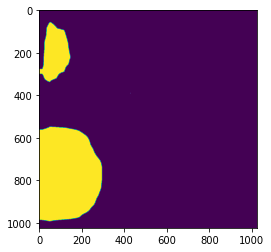

In [61]:
plt.imshow(pred_mask)
plt.show()

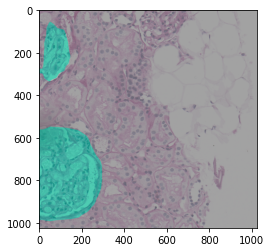

In [62]:
# 可视化预测结果
visualization = show_result_pyplot(model, img, result, opacity=0.7, out_file='./output/pred.jpg')
plt.imshow(mmcv.bgr2rgb(visualization))
plt.show()

## 语义分割测试结果-连通域分析

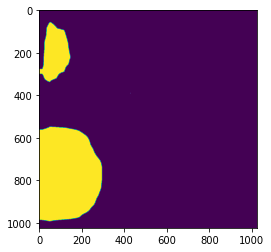

In [63]:
plt.imshow(np.uint8(pred_mask))
plt.show()

In [64]:
connected = cv2.connectedComponentsWithStats(np.uint8(pred_mask), connectivity=4)

In [65]:
# 连通域个数（第一个有可能是全图，可以忽略）
connected[0]

4

In [66]:
# 用整数表示每个连通域区域
connected[1].shape

(1024, 1024)

In [67]:
np.unique(connected[1])

array([0, 1, 2, 3], dtype=int32)

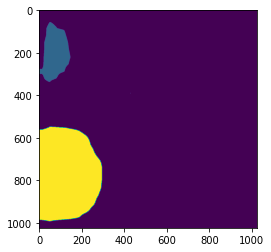

In [68]:
plt.imshow(connected[1])
plt.show()

In [69]:
# 每个连通域外接矩形的左上角X、左上角Y、宽度、高度、面积
connected[2]

array([[     0,      0,   1024,   1024, 910594],
       [     0,     57,    147,    281,  26123],
       [   428,    390,      2,      1,      2],
       [     0,    548,    296,    444, 111857]], dtype=int32)

In [70]:
# 每个连通域的质心坐标
connected[3]

array([[570.72971269, 488.47612877],
       [ 74.88267044, 202.11503273],
       [428.5       , 390.        ],
       [131.29759425, 771.18607687]])

## 获取测试集标注

In [72]:
label = mmcv.imread('./data/Glomeruli-dataset/masks/VUHSK_1702_39.png')

In [73]:
label_mask = label[:,:,0]

In [74]:
label_mask.shape

(1024, 1024)

In [75]:
np.unique(label_mask)

array([0, 1], dtype=uint8)

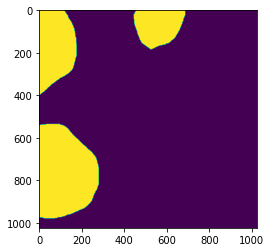

In [76]:
plt.imshow(label_mask)
plt.show()

## 对比测试集标注和语义分割预测结果

In [77]:
# 测试集标注
label_mask.shape

(1024, 1024)

In [78]:
# 语义分割预测结果
pred_mask.shape

(1024, 1024)

In [79]:
# 真实为前景，预测为前景
TP = (label_mask == 1) & (pred_mask==1)

In [80]:
# 真实为背景，预测为背景
TN = (label_mask == 0) & (pred_mask==0)

In [81]:
# 真实为前景，预测为背景
FN = (label_mask == 1) & (pred_mask==0)

In [82]:
# 真实为背景，预测为前景
FP = (label_mask == 0) & (pred_mask==1)

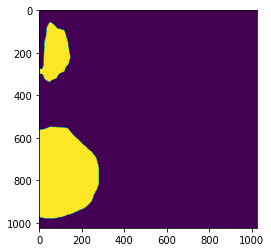

In [83]:
plt.imshow(TP)
plt.show()

In [84]:
confusion_map = TP * 255 + FP * 150 + FN * 80 + TN * 10

In [85]:
confusion_map = TP * 255 + FP * 150 + FN * 80 + TN * 10

## 混淆矩阵

In [89]:
from sklearn.metrics import confusion_matrix

In [91]:
confusion_matrix_model = confusion_matrix(label_mask.flatten(), pred_mask.flatten())

In [92]:
import itertools
def cnf_matrix_plotter(cm, classes, cmap=plt.cm.Blues):
    """
    传入混淆矩阵和标签名称列表，绘制混淆矩阵
    """
    plt.figure(figsize=(10, 10))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # plt.colorbar() # 色条
    tick_marks = np.arange(len(classes))
    
    plt.title('Confusion Matrix', fontsize=30)
    plt.xlabel('Pred', fontsize=25, c='r')
    plt.ylabel('True', fontsize=25, c='r')
    plt.tick_params(labelsize=16) # 设置类别文字大小
    plt.xticks(tick_marks, classes, rotation=90) # 横轴文字旋转
    plt.yticks(tick_marks, classes)
    
    # 写数字
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 fontsize=12)

    plt.tight_layout()

    plt.savefig('混淆矩阵.pdf', dpi=300) # 保存图像
    plt.show()

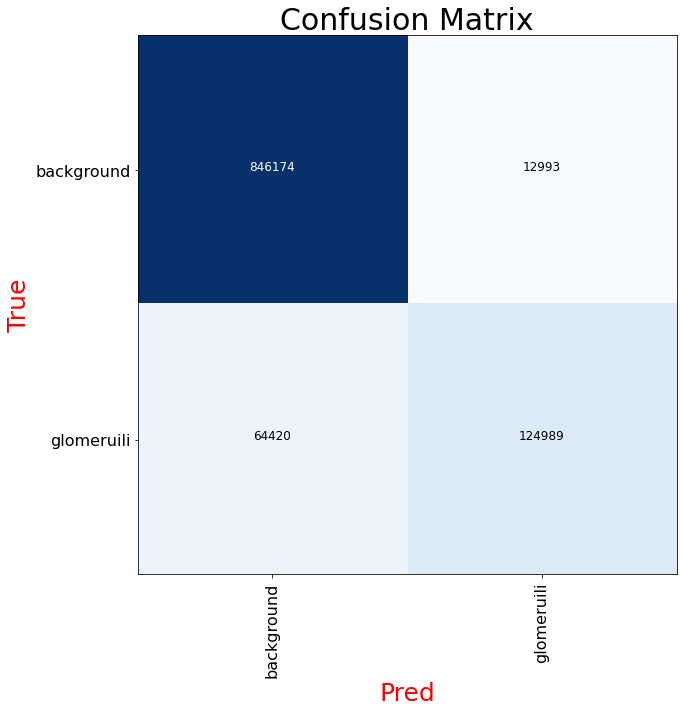

In [93]:
cnf_matrix_plotter(confusion_matrix_model, classes, cmap='Blues')

# 测试集性能评估

往./mmseg/datasets/__init__.py中添加一个StanfordBackgroundDataset数据集用于测试

In [95]:
# 数据集配置文件
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/StanfordBackgroundDataset.py -O ./mmseg/datasets/StanfordBackgroundDataset.py

# 修改 ../mmsegmentation/mmseg/datasets/__init__.py，添加数据集
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/__init__.py -O ./mmseg/datasets/__init__.py


--2023-02-11 00:27:21--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/StanfordBackgroundDataset.py
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 455 [binary/octet-stream]
正在保存至: “./mmseg/datasets/StanfordBackgroundDataset.py”

./mmseg/datasets/St 100%[===================>]     455  --.-KB/s    用时 0s      

2023-02-11 00:27:22 (13.3 MB/s) - 已保存 “./mmseg/datasets/StanfordBackgroundDataset.py” [455/455])

--2023-02-11 00:27:22--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/__init__.py
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 2659 (2.6K) [binary/octet-stream]
正在保存至: “./mmseg/datasets/__init__.py”

./mmseg/datasets/__ 100%[===================>]   2.60K  --.-KB/s    用时 0s      

2023-02-11 00:27:22 (12.0 MB/s) - 已保存 “./mmseg/datasets/__init__.py” [2659/2659])



## 测试集精读指标

In [97]:
!python ./tools/test.py ./checkpoint/new_cfg.py ./work_dirs/tutorial/iter_800.pth

02/11 00:27:46 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.10 (default, Jun  4 2021, 14:48:32) [GCC 7.5.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce RTX 3060
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.2, V11.2.152
    GCC: gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
    PyTorch: 1.10.1+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-

## 速度指标-FPS

In [98]:
!python ./tools/analysis_tools/benchmark.py ./checkpoint/new_cfg.py ./work_dirs/tutorial/iter_800.pth

Run 1:
02/11 00:30:01 - mmengine - WARNING - The "dataset" registry in mmseg did not set import location. Fallback to call `mmseg.utils.register_all_modules` instead.
02/11 00:30:01 - mmengine - WARNING - The "transform" registry in mmseg did not set import location. Fallback to call `mmseg.utils.register_all_modules` instead.
02/11 00:30:01 - mmengine - WARNING - The "data sampler" registry in mmseg did not set import location. Fallback to call `mmseg.utils.register_all_modules` instead.
02/11 00:30:01 - mmengine - WARNING - The "model" registry in mmseg did not set import location. Fallback to call `mmseg.utils.register_all_modules` instead.
/home/featurize/work/OpenMMlab_AI_2023.2/run/mmsegmentation/mmseg/models/decode_heads/decode_head.py:120: UserWarning: For binary segmentation, we suggest using`out_channels = 1` to define the outputchannels of segmentor, and use `threshold`to convert `seg_logits` into a predictionapplying a threshold
  warnings.warn('For binary segmentation, we 